<a href="https://colab.research.google.com/github/VolodymyrLnnk/Machine-Learning-with-Python-for-Data-Science/blob/main/Generative_AI_for_Data_Science_01012025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Define the URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

# Task 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv(URL)

# Task 2: Display the first 5 rows of the DataFrame
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [2]:
# Task 3: Identify columns with missing values
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_columns)

# Task 4: Replace missing values with the mean of each column
df[missing_columns] = df[missing_columns].fillna(df[missing_columns].mean())

# Task 5: Remove duplicate entries from the DataFrame
df = df.drop_duplicates()

# Display the cleaned DataFrame
print(df.head())

Columns with missing values: Index(['tax'], dtype='object')
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [3]:
import pandas as pd

# Define the URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

# Task 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv(URL)

# Task 2: Display the first 5 rows of the DataFrame
print(df.head())

# Task 3: Identify columns with missing values
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_columns)

# Task 4: Ensure numeric columns for mean replacement
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Task 5: Remove duplicate entries from the DataFrame
df = df.drop_duplicates()

# Display the cleaned DataFrame
print(df.head())

# Task 6: Identify top 5 attributes with the highest correlation with the target attribute (assumed to be the last column)
target_attribute = df.columns[-1]
if target_attribute in numeric_columns:
    correlations = df[numeric_columns].corr()[target_attribute].sort_values(ascending=False)
    top_5_attributes = correlations[1:6]  # Exclude the target itself
    print("Top 5 attributes with highest correlation to target attribute:")
    print(top_5_attributes)
else:
    print("Target attribute is not numeric, correlation cannot be calculated.")


     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  
Columns with missing values: Index(['tax'], dtype='object')
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     148

In [4]:
# Task 7: Count the number of entries for each unique value of a specific attribute
attribute = 'fuelType'  # Replace 'fuelType' with the desired column name
value_counts = df[attribute].value_counts()
print(f"Number of entries for each unique value in '{attribute}':")
print(value_counts)

Number of entries for each unique value in 'fuelType':
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

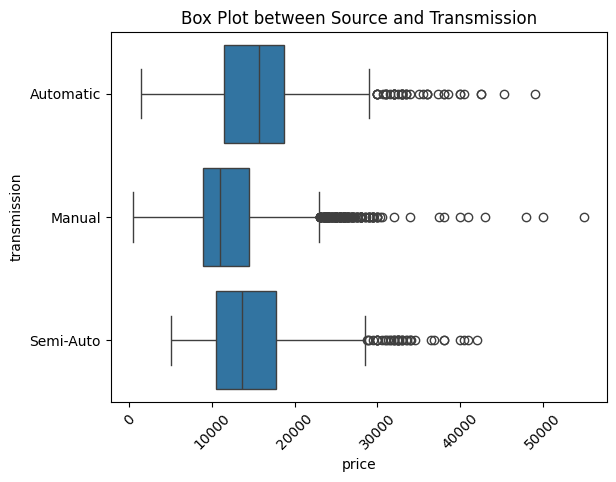

In [6]:
# Task 8: Create a Seaborn box plot between 'source' and 'transmission' attributes
sns.boxplot(x='price', y='transmission', data=df)
plt.title('Box Plot between Source and Transmission')
plt.xticks(rotation=45)
plt.show()

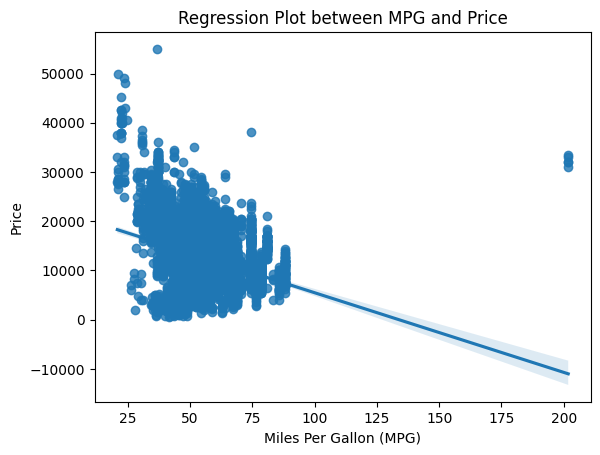

In [7]:
# Task 9: Create a Seaborn regression plot between 'mpg' and 'price' attributes
sns.regplot(x='mpg', y='price', data=df)
plt.title('Regression Plot between MPG and Price')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Price')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [13]:
# Task 10: Fit a linear regression model on 'price' based on 'mpg'
df_single = df[['mpg', 'price']].dropna()

X = df_single[['mpg']]
y = df_single['price']

model = LinearRegression()
model.fit(X, y)

# Predict and evaluate the model
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R^2 value: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

R^2 value: 0.11989802249624182
Mean Squared Error (MSE): 19741690.80944619


In [14]:
from sklearn.model_selection import train_test_split

In [16]:
# Task 11: Fit a linear regression model on 'price' based on multiple source variables
available_columns = set(df.columns)
source_variables = [col for col in ['year', 'mileage', 'tax', 'mpg', 'engineSize'] if col in available_columns]
target_variable = 'price'

# Ensure no missing values in selected columns
df_multi = df[source_variables + [target_variable]].dropna()

X_multi = df_multi[source_variables]
y_multi = df_multi[target_variable]

model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# Predict and evaluate the model
y_multi_pred = model_multi.predict(X_multi)

r2_multi = r2_score(y_multi, y_multi_pred)
mse_multi = mean_squared_error(y_multi, y_multi_pred)

print(f"R^2 value (Multiple Variables): {r2_multi}")
print(f"Mean Squared Error (MSE, Multiple Variables): {mse_multi}")

R^2 value (Multiple Variables): 0.11989802249624182
Mean Squared Error (MSE, Multiple Variables): 19741690.80944619


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [18]:
# Task 12: Create a pipeline with StandardScaler, PolynomialFeatures (degree=2), and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline to the selected source variables and target variable
pipeline.fit(X_multi, y_multi)

# Predict and evaluate the pipeline model
y_pipeline_pred = pipeline.predict(X_multi)

r2_pipeline = r2_score(y_multi, y_pipeline_pred)
mse_pipeline = mean_squared_error(y_multi, y_pipeline_pred)

print(f"R^2 value (Pipeline Model): {r2_pipeline}")
print(f"Mean Squared Error (MSE, Pipeline Model): {mse_pipeline}")

R^2 value (Pipeline Model): 0.17062168290242674
Mean Squared Error (MSE, Pipeline Model): 18603901.27362166


In [19]:
from sklearn.linear_model import LinearRegression, Ridge

In [20]:
# Task 13: Ridge Regression with train-test split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict and evaluate the Ridge model
y_ridge_pred = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_ridge_pred)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)

print(f"R^2 value (Ridge Regression): {r2_ridge}")
print(f"Mean Squared Error (MSE, Ridge Regression): {mse_ridge}")

R^2 value (Ridge Regression): 0.15043437086384115
Mean Squared Error (MSE, Ridge Regression): 19049855.212837838


In [21]:
# Task 13: Ridge Regression with Polynomial Scaling
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Apply polynomial features and scaling
poly = PolynomialFeatures(degree=2)
scaler = StandardScaler()

X_train_poly = scaler.fit_transform(poly.fit_transform(X_train))
X_test_poly = scaler.transform(poly.transform(X_test))

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Predict and evaluate the Ridge model
y_ridge_pred = ridge_model.predict(X_test_poly)

r2_ridge = r2_score(y_test, y_ridge_pred)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)

print(f"R^2 value (Polynomial Ridge Regression): {r2_ridge}")
print(f"Mean Squared Error (MSE, Polynomial Ridge Regression): {mse_ridge}")


R^2 value (Polynomial Ridge Regression): 0.18479452917436912
Mean Squared Error (MSE, Polynomial Ridge Regression): 18279395.55856569


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

In [23]:
# Define the URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [24]:
# Task 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv(URL)

# Task 2: Display the first 5 rows of the DataFrame
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [25]:
# Display all column names
print("Available columns:")
print(df.columns)

Available columns:
Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'price'],
      dtype='object')


In [26]:
# Task 3: Identify columns with missing values
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_columns)

Columns with missing values: Index(['tax'], dtype='object')


In [27]:
# Task 4: Replace missing values with the mean of each column
df[missing_columns] = df[missing_columns].fillna(df[missing_columns].mean())

# Task 5: Remove duplicate entries from the DataFrame
df = df.drop_duplicates()

# Display the cleaned DataFrame
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [32]:
# Task 6: Identify top 5 attributes with the highest correlation with the target attribute (assumed to be the last column)
#target_attribute = df.columns[-1]
#correlations = df.corr()[target_attribute].sort_values(ascending=False)
#top_5_attributes = correlations[1:6]  # Exclude the target itself
#print("Top 5 attributes with highest correlation to target attribute:")
#print(top_5_attributes)

# Task 6: Identify top 5 attributes with the highest correlation with the target attribute (assumed to be the last column)
target_attribute = df.columns[-1]
if target_attribute in numeric_columns:
    correlations = df[numeric_columns].corr()[target_attribute].sort_values(ascending=False)
    top_5_attributes = correlations[1:6]  # Exclude the target itself
    print("Top 5 attributes with highest correlation to target attribute:")
    print(top_5_attributes)
else:
    print("Target attribute is not numeric, correlation cannot be calculated.")

Top 5 attributes with highest correlation to target attribute:
year          0.635715
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64


In [33]:
# Task 7: Count the number of entries for each unique value of a specific attribute
attribute = 'fuelType'
value_counts = df[attribute].value_counts()
print(f"Number of entries for each unique value in '{attribute}':")
print(value_counts)

Number of entries for each unique value in 'fuelType':
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


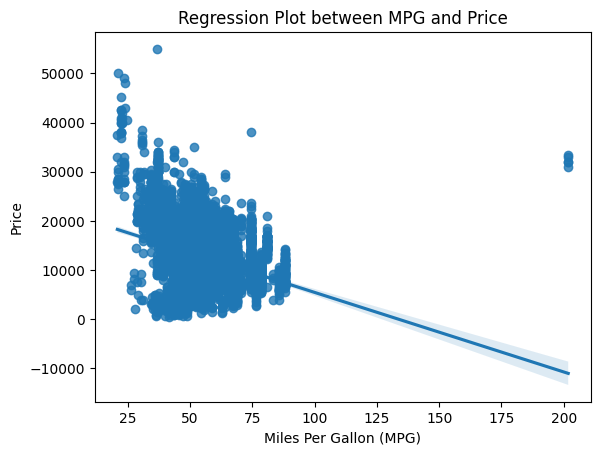

In [34]:
# Task 8: Create a Seaborn regression plot between 'mpg' and 'price' attributes
sns.regplot(x='mpg', y='price', data=df)
plt.title('Regression Plot between MPG and Price')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Price')
plt.show()

In [35]:
# Task 9: Ridge Regression with Polynomial Scaling and GridSearchCV
available_columns = set(df.columns)
source_variables = [col for col in ['year', 'mileage', 'tax', 'mpg', 'engineSize'] if col in available_columns]
target_variable = 'price'

# Ensure no missing values in selected columns
df_multi = df[source_variables + [target_variable]].dropna()

X = df_multi[source_variables]
y = df_multi[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features and scaling
poly = PolynomialFeatures(degree=2)
scaler = StandardScaler()

X_train_poly = scaler.fit_transform(poly.fit_transform(X_train))
X_test_poly = scaler.transform(poly.transform(X_test))

# Define Ridge Regression with GridSearchCV
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=4, scoring='r2')
grid_search.fit(X_train_poly, y_train)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value found: {best_alpha}")

# Train the Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_poly, y_train)

# Predict and evaluate the Ridge model
y_ridge_pred = ridge_best.predict(X_test_poly)

r2_ridge = r2_score(y_test, y_ridge_pred)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)

print(f"R^2 value (Ridge Regression with GridSearchCV): {r2_ridge}")
print(f"Mean Squared Error (MSE, Ridge Regression with GridSearchCV): {mse_ridge}")

Best alpha value found: 0.01
R^2 value (Ridge Regression with GridSearchCV): 0.6011362811991345
Mean Squared Error (MSE, Ridge Regression with GridSearchCV): 8943742.345763829
